# Environment Setup

In [1]:
!pip -q install xarray
!pip -q install zarr gcsfs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.1/284.1 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 40.4 MB/s eta 0:00:00


In [2]:
import xarray as xr
import numpy as np
import json

In [4]:
from google.colab import auth
auth.authenticate_user()

# Data Preparation

In [20]:
variables = [
    '2m_temperature',
    '10m_u_component_of_wind',
    '10m_v_component_of_wind',
    'mean_sea_level_pressure',
]
precip = "total_precipitation_6hr"
# leads = list(range(6, 49, 6))  # 6,12,...,48
leads = list(range(6, 25, 6))

In [19]:
era5_path = "gs://weatherbench2/datasets/era5/1959-2022-full_37-6h-0p25deg_derived.zarr"
ds_raw = xr.open_zarr(era5_path)
ds_raw

<xarray.Dataset> Size: 326GB
Dimensions:                                           (time: 92040,
                                                       longitude: 128,
                                                       latitude: 64, level: 13)
Coordinates:
  * time                                              (time) datetime64[ns] 736kB ...
  * longitude                                         (longitude) float64 1kB ...
  * latitude                                          (latitude) float64 512B ...
  * level                                             (level) int64 104B 50 ....
Data variables: (12/38)
    10m_u_component_of_wind                           (time, longitude, latitude) float32 3GB dask.array<chunksize=(40, 128, 64), meta=np.ndarray>
    10m_v_component_of_wind                           (time, longitude, latitude) float32 3GB dask.array<chunksize=(40, 128, 64), meta=np.ndarray>
    10m_wind_speed                                    (time, longitude, latitude) float32 3GB dask.array<chunksize=(40, 128, 64), meta=np.ndarray>
    2m_temperature                                    (time, longitude, latitude) float32 3GB dask.array<chunksize=(40, 128, 64), meta=np.ndarray>
    angle_of_sub_gridscale_orography                  (longitude, latitude) float32 33kB dask.array<chunksize=(128, 64), meta=np.ndarray>
    anisotropy_of_sub_gridscale_orography             (longitude, latitude) float32 33kB dask.array<chunksize=(128, 64), meta=np.ndarray>
    ...                                                ...
    type_of_high_vegetation                           (longitude, latitude) float32 33kB dask.array<chunksize=(128, 64), meta=np.ndarray>
    type_of_low_vegetation                            (longitude, latitude) float32 33kB dask.array<chunksize=(128, 64), meta=np.ndarray>
    u_component_of_wind                               (time, level, longitude, latitude) float32 39GB dask.array<chunksize=(40, 13, 128, 64), meta=np.ndarray>
    v_component_of_wind                               (time, level, longitude, latitude) float32 39GB dask.array<chunksize=(40, 13, 128, 64), meta=np.ndarray>
    vertical_velocity                                 (time, level, longitude, latitude) float32 39GB dask.array<chunksize=(40, 13, 128, 64), meta=np.ndarray>
    wind_speed                                        (time, level, longitude, latitude) float32 39GB dask.array<chunksize=(40, 13, 128, 64), meta=np.ndarray>

In [18]:
clim_path = 'gs://weatherbench2/datasets/era5-hourly-climatology/1990-2019_6h_1440x721.zarr'
ds_clim =  xr.open_zarr(clim_path)
ds_clim

<xarray.Dataset> Size: 5GB
Dimensions:                                      (hour: 4, dayofyear: 366,
                                                  longitude: 128, latitude: 64,
                                                  level: 13)
Coordinates:
  * hour                                         (hour) int64 32B 0 6 12 18
  * dayofyear                                    (dayofyear) int64 3kB 1 ... 366
  * longitude                                    (longitude) float64 1kB 0.0 ...
  * latitude                                     (latitude) float64 512B -90....
  * level                                        (level) int64 104B 50 ... 1000
Data variables: (12/28)
    10m_u_component_of_wind                      (hour, dayofyear, longitude, latitude) float32 48MB dask.array<chunksize=(4, 366, 128, 64), meta=np.ndarray>
    10m_v_component_of_wind                      (hour, dayofyear, longitude, latitude) float32 48MB dask.array<chunksize=(4, 366, 128, 64), meta=np.ndarray>
    10m_wind_speed                               (hour, dayofyear, longitude, latitude) float32 48MB dask.array<chunksize=(4, 366, 128, 64), meta=np.ndarray>
    2m_temperature                               (hour, dayofyear, longitude, latitude) float32 48MB dask.array<chunksize=(4, 366, 128, 64), meta=np.ndarray>
    geopotential                                 (hour, dayofyear, level, longitude, latitude) float32 624MB dask.array<chunksize=(4, 366, 3, 128, 64), meta=np.ndarray>
    mean_sea_level_pressure                      (hour, dayofyear, longitude, latitude) float32 48MB dask.array<chunksize=(4, 366, 128, 64), meta=np.ndarray>
    ...                                           ...
    total_precipitation_6hr_seeps_dry_fraction   (hour, dayofyear, longitude, latitude) float32 48MB dask.array<chunksize=(4, 366, 128, 64), meta=np.ndarray>
    total_precipitation_6hr_seeps_threshold      (hour, dayofyear, longitude, latitude) float32 48MB dask.array<chunksize=(4, 366, 128, 64), meta=np.ndarray>
    u_component_of_wind                          (hour, dayofyear, level, longitude, latitude) float32 624MB dask.array<chunksize=(4, 366, 3, 128, 64), meta=np.ndarray>
    v_component_of_wind                          (hour, dayofyear, level, longitude, latitude) float32 624MB dask.array<chunksize=(4, 366, 3, 128, 64), meta=np.ndarray>
    vertical_velocity                            (hour, dayofyear, level, longitude, latitude) float32 624MB dask.array<chunksize=(4, 366, 3, 128, 64), meta=np.ndarray>
    wind_speed                                   (hour, dayofyear, level, longitude, latitude) float32 624MB dask.array<chunksize=(4, 366, 3, 128, 64), meta=np.ndarray>

In [21]:
init_hour = 0
ds_2022 = ds_raw.sel(time=slice("2021-01-01", "2021-12-31T23:59:59"))
init_times = ds_2022.time.where(ds_2022.time.dt.hour == init_hour, drop=True)

# Metrics

In [11]:
def latitude_area_weights_xr(lat: xr.DataArray) -> xr.DataArray:
    """
    lat: 1D DataArray with dim 'latitude' in degrees (ascending or descending).
    returns: w_lat[latitude] with Σ_i w(i) = I (paper convention).
    """
    if lat.ndim != 1 or lat.dims[0] != "latitude":
        raise ValueError("Expected lat to be a 1D DataArray with dim name 'latitude'.")

    lat_vals = lat.values.astype(np.float64)  # degrees

    # Cell edges via midpoints
    edges = np.empty(lat_vals.size + 1, dtype=np.float64)
    edges[1:-1] = 0.5 * (lat_vals[:-1] + lat_vals[1:])

    # End edges: half-grid extrapolation + clamp to poles
    edges[0] = np.clip(lat_vals[0] + 0.5 * (lat_vals[0] - lat_vals[1]), -90.0, 90.0)
    edges[-1] = np.clip(lat_vals[-1] + 0.5 * (lat_vals[-1] - lat_vals[-2]), -90.0, 90.0)

    theta_u_deg = np.maximum(edges[:-1], edges[1:])
    theta_l_deg = np.minimum(edges[:-1], edges[1:])

    a = np.sin(np.deg2rad(theta_u_deg)) - np.sin(np.deg2rad(theta_l_deg))  # a_i
    w = a / a.mean()  # <-- denominator has (1/I) Σ a_i

    return xr.DataArray(w, dims=("latitude",), coords={"latitude": lat})

In [12]:
def spatial_mean(x: xr.DataArray, w_lat: xr.DataArray) -> xr.DataArray:
    """
    x dims include ('latitude','longitude'); w_lat is 1D over 'latitude' with Σ_i w(i)=I.
    returns: (1/(I*J)) * Σ_{i,j} w(i) x_{i,j}
    """
    I = x.sizes["latitude"]
    J = x.sizes["longitude"]
    return (x * w_lat).sum(dim=("latitude", "longitude")) / (I * J)

In [13]:
def weighted_mae(pred: xr.DataArray, tgt: xr.DataArray, w_lat: xr.DataArray) -> float:
    return float(spatial_mean(np.abs(pred - tgt), w_lat).mean("time").compute())

def weighted_rmse(pred: xr.DataArray, tgt: xr.DataArray, w_lat: xr.DataArray) -> float:
    mse_t = spatial_mean((pred - tgt) ** 2, w_lat)  # [time]
    return float(np.sqrt(mse_t.mean("time")).compute())

def weighted_rmsb(pred: xr.DataArray, tgt: xr.DataArray, w_lat: xr.DataArray) -> float:
    """
    Paper definition:

      Bias_{i,j} = (1/T) Σ_t (pred_{t,i,j} - tgt_{t,i,j})
      RMSB = sqrt( (1/(I*J)) Σ_{i,j} w(i) * Bias_{i,j}^2 )

    This is NOT global mean bias.
    """
    bias_ij = (pred - tgt).mean(dim="time")  # [lat, lon]
    msb = spatial_mean(bias_ij ** 2, w_lat)          # scalar
    return float(np.sqrt(msb).compute())

def anomaly_correlation(pred: xr.DataArray, tgt: xr.DataArray, clim_valid: xr.DataArray, w_lat: xr.DataArray) -> float:
    """
    ACC(t) = <(pred-clim),(tgt-clim)> / sqrt(<(pred-clim)^2><(tgt-clim)^2>)
    with <x> = (1/(I*J)) Σ_{i,j} w(i) x_{i,j} (paper convention).
    """
    pa = pred - clim_valid
    ta = tgt - clim_valid

    num = spatial_mean(pa * ta, w_lat)  # [time]
    den = np.sqrt(spatial_mean(pa * pa, w_lat) * spatial_mean(ta * ta, w_lat))  # [time]
    acc_t = num / den
    return float(acc_t.mean("time").compute())


In [22]:
w_lat = latitude_area_weights_xr(ds_2022["latitude"])

# Climatology

In [ ]:
results = {v: {lh: {} for lh in leads} for v in variables}
for lh in leads:
    valid_times = init_times + np.timedelta64(lh, "h")
    valid_times = valid_times.where(
        (valid_times >= ds_2022.time.min()) & (valid_times <= ds_2022.time.max()),
        drop=True,
    )
    tgt = ds_2022[variables].sel(time=valid_times)

    doy = tgt.time.dt.dayofyear
    hod = tgt.time.dt.hour

    clim_valid = ds_clim[variables].sel(dayofyear=doy, hour=hod)

    for v in variables:
        pred_v = clim_valid[v]
        tgt_v = tgt[v]

        results[v][lh]["rmse"] = weighted_rmse(pred_v, tgt_v, w_lat)
        # results[v][lh]["acc"]  = anomaly_correlation(pred_v, tgt_v, clim_valid[v], w_lat)
        results[v][lh]["rmsb"] = weighted_rmsb(pred_v, tgt_v, w_lat)
        results[v][lh]["mae"]  = weighted_mae(pred_v, tgt_v, w_lat)

        # break

In [ ]:
with open("clim_results.json", "w") as f:
    json.dump(results, f, indent=2)

# Persistence

In [ ]:
results = {v: {lh: {} for lh in leads} for v in variables}
for lh in leads:
    valid_times = init_times + np.timedelta64(lh, "h")
    valid_times = valid_times.where(
        (valid_times >= ds_2022.time.min()) & (valid_times <= ds_2022.time.max()),
        drop=True,
    )
    tgt = ds_2022[variables].sel(time=valid_times)

    init_used = valid_times - np.timedelta64(lh, "h")
    pred0 = ds_2022[variables].sel(time=init_used)
    pred = pred0.assign_coords(time=valid_times)

    doy = tgt.time.dt.dayofyear
    hod = tgt.time.dt.hour

    clim_valid = ds_clim[variables].sel(dayofyear=doy, hour=hod)

    for v in variables:
        pred_v = pred[v]
        tgt_v = tgt[v]

        results[v][lh]["rmse"] = weighted_rmse(pred_v, tgt_v, w_lat)
        results[v][lh]["rmsb"] = weighted_rmsb(pred_v, tgt_v, w_lat)
        results[v][lh]["mae"]  = weighted_mae(pred_v, tgt_v, w_lat)


In [ ]:
with open("persis_results.json", "w") as f:
    json.dump(results, f, indent=2)

# CCDF

In [ ]:
import matplotlib.pyplot as plt

seed = 0
rng = np.random.default_rng(seed)
sample_cap=2_000_000

def get_samples(da: xr.DataArray) -> np.ndarray:
    x = da.data  # may be dask
    x = np.asarray(da.values).ravel()  # trigger compute if dask
    x = x[np.isfinite(x)]
    if x.size > sample_cap:
        idx = rng.choice(x.size, size=sample_cap, replace=False)
        x = x[idx]
    return x

In [ ]:
def ccdf_from_samples(
    x: np.ndarray,
    n_points=400,
    positive_only=False,
    q_lo=0.50,
    q_hi=0.9999,
    eps=1e-12,
):
    """
    Compute CCDF P(X > v) over thresholds v in [quantile(q_lo), quantile(q_hi)].
    For positive_only vars, thresholds are log-spaced; otherwise linear-spaced.
    """
    x = np.asarray(x).ravel()
    x = x[np.isfinite(x)]
    if positive_only:
        x = x[x > 0]
    if x.size == 0:
        raise ValueError("No valid samples after filtering.")

    lo = float(np.quantile(x, q_lo))
    hi = float(np.quantile(x, q_hi))
    if positive_only:
        lo = max(lo, eps)
        hi = max(hi, lo * 1.01)
        v_grid = np.logspace(np.log10(lo), np.log10(hi), n_points)
    else:
        hi = max(hi, lo + 1e-12)
        v_grid = np.linspace(lo, hi, n_points)

    ccdf = np.array([(x > v).mean() for v in v_grid], dtype=np.float64)
    return v_grid, ccdf

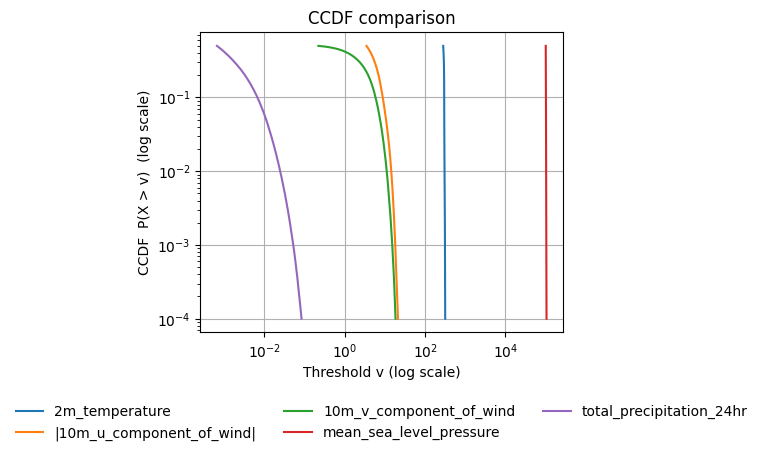

In [ ]:
plt.figure()
plt.yscale("log")
plt.xscale("log")

n_points = 400
for v in variables:
    x = get_samples(ds_2022[v])
    # These fields can be negative (winds) or have wide ranges (pressure/temp),
    # so we plot CCDF of the *upper tail* using thresholds from median to 99.99%.
    v_grid, ccdf = ccdf_from_samples(
        x, n_points=n_points, positive_only=False, q_lo=0.50, q_hi=0.9999
    )

    # If v_grid includes non-positive values, log-x cannot plot them.
    # For the upper-tail range (median->99.99%), this is usually positive for temp/pressure,
    # but winds may have negative median. We therefore shift to using |wind| for wind components.
    if np.any(v_grid <= 0):
        if "u_component" in v or "v_component" in v:
            x_abs = np.abs(x)
            v_grid, ccdf = ccdf_from_samples(
                x_abs, n_points=n_points, positive_only=True, q_lo=0.50, q_hi=0.9999
            )
            label = f"|{v}|"
        else:
            # fallback: drop non-positive thresholds (keeps tail region if positive)
            mask = v_grid > 0
            v_grid, ccdf = v_grid[mask], ccdf[mask]
            label = v
    else:
        label = v

    plt.plot(v_grid, ccdf, label=f"{label}")

# Plot precip (strictly positive tail)
x_p = get_samples(ds_2022[precip])
v_p, s_p = ccdf_from_samples(
    x_p, n_points=n_points, positive_only=True, q_lo=0.50, q_hi=0.9999
)
plt.plot(v_p, s_p, label=f"{precip}")

plt.xlabel("Threshold v (log scale)")
plt.ylabel("CCDF  P(X > v)  (log scale)")
plt.title("CCDF comparison")
plt.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, -0.20),
    ncol=3,
    frameon=False
)
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
t2m_name = "2m_temperature"
tp24_name = "total_precipitation_24hr"

t2m = get_samples(ds_2022[t2m_name])
tp24 = get_samples(ds_2022[tp24_name])

# CCDFs
v_t, s_t = ccdf_from_samples(t2m, n_points=400, positive_only=False)
v_p, s_p = ccdf_from_samples(tp24, n_points=400, positive_only=True)


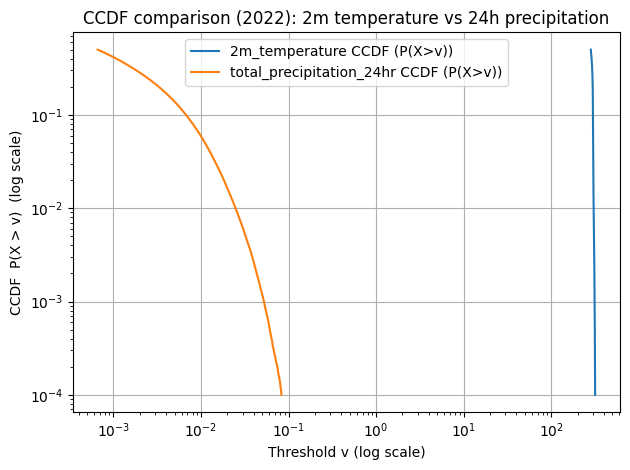

In [ ]:
# Plot
plt.figure()
plt.yscale("log")

# Temperature: x linear, y log
plt.plot(v_t, s_t, label=f"{t2m_name} CCDF (P(X>v))")

# Precip: values are positive; CCDF uses log-spaced thresholds; x log helps readability
plt.plot(v_p, s_p, label=f"{tp24_name} CCDF (P(X>v))")
plt.xscale("log")  # single axis: log makes precip tail readable; temp still OK over tail range

plt.xlabel("Threshold v (log scale)")
plt.ylabel("CCDF  P(X > v)  (log scale)")
plt.title("CCDF comparison (2022): 2m temperature vs 24h precipitation")
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

# Statistical Models

In [ ]:
ds_train_daily = ds_daily.sel(time=slice("2019-01-01", "2021-12-31"))
ds_train_daily

<xarray.Dataset> Size: 45GB
Dimensions:                                             (time: 1096,
                                                         longitude: 240,
                                                         latitude: 121,
                                                         level: 13)
Coordinates:
  * time                                                (time) datetime64[ns] 9kB ...
  * longitude                                           (longitude) float64 2kB ...
  * latitude                                            (latitude) float64 968B ...
  * level                                               (level) int64 104B 50...
Data variables: (12/103)
    10m_u_component_of_wind                             (time, longitude, latitude) float32 127MB dask.array<chunksize=(21, 240, 121), meta=np.ndarray>
    10m_u_component_of_wind_max                         (time, longitude, latitude) float32 127MB dask.array<chunksize=(21, 240, 121), meta=np.ndarray>
    10m_u_component_of_wind_min                         (time, longitude, latitude) float32 127MB dask.array<chunksize=(21, 240, 121), meta=np.ndarray>
    10m_v_component_of_wind                             (time, longitude, latitude) float32 127MB dask.array<chunksize=(21, 240, 121), meta=np.ndarray>
    10m_v_component_of_wind_max                         (time, longitude, latitude) float32 127MB dask.array<chunksize=(21, 240, 121), meta=np.ndarray>
    10m_v_component_of_wind_min                         (time, longitude, latitude) float32 127MB dask.array<chunksize=(21, 240, 121), meta=np.ndarray>
    ...                                                  ...
    volumetric_soil_water_layer_3                       (time, longitude, latitude) float32 127MB dask.array<chunksize=(21, 240, 121), meta=np.ndarray>
    volumetric_soil_water_layer_3_max                   (time, longitude, latitude) float32 127MB dask.array<chunksize=(21, 240, 121), meta=np.ndarray>
    volumetric_soil_water_layer_3_min                   (time, longitude, latitude) float32 127MB dask.array<chunksize=(21, 240, 121), meta=np.ndarray>
    volumetric_soil_water_layer_4                       (time, longitude, latitude) float32 127MB dask.array<chunksize=(21, 240, 121), meta=np.ndarray>
    volumetric_soil_water_layer_4_max                   (time, longitude, latitude) float32 127MB dask.array<chunksize=(21, 240, 121), meta=np.ndarray>
    volumetric_soil_water_layer_4_min                   (time, longitude, latitude) float32 127MB dask.array<chunksize=(21, 240, 121), meta=np.ndarray>

In [ ]:
lat_target = 39.952554067544504
lon_target = -75.19100578156738
lon_target = lon_target % 360
ds_train_daily = ds_train_daily.sel(latitude=lat_target, longitude=lon_target, method="nearest")
ds_train_daily

<xarray.Dataset> Size: 2MB
Dimensions:                                             (time: 1096, level: 13)
Coordinates:
  * time                                                (time) datetime64[ns] 9kB ...
  * level                                               (level) int64 104B 50...
    latitude                                            float64 8B 40.5
    longitude                                           float64 8B 285.0
Data variables: (12/103)
    10m_u_component_of_wind                             (time) float32 4kB dask.array<chunksize=(21,), meta=np.ndarray>
    10m_u_component_of_wind_max                         (time) float32 4kB dask.array<chunksize=(21,), meta=np.ndarray>
    10m_u_component_of_wind_min                         (time) float32 4kB dask.array<chunksize=(21,), meta=np.ndarray>
    10m_v_component_of_wind                             (time) float32 4kB dask.array<chunksize=(21,), meta=np.ndarray>
    10m_v_component_of_wind_max                         (time) float32 4kB dask.array<chunksize=(21,), meta=np.ndarray>
    10m_v_component_of_wind_min                         (time) float32 4kB dask.array<chunksize=(21,), meta=np.ndarray>
    ...                                                  ...
    volumetric_soil_water_layer_3                       (time) float32 4kB dask.array<chunksize=(21,), meta=np.ndarray>
    volumetric_soil_water_layer_3_max                   (time) float32 4kB dask.array<chunksize=(21,), meta=np.ndarray>
    volumetric_soil_water_layer_3_min                   (time) float32 4kB dask.array<chunksize=(21,), meta=np.ndarray>
    volumetric_soil_water_layer_4                       (time) float32 4kB dask.array<chunksize=(21,), meta=np.ndarray>
    volumetric_soil_water_layer_4_max                   (time) float32 4kB dask.array<chunksize=(21,), meta=np.ndarray>
    volumetric_soil_water_layer_4_min                   (time) float32 4kB dask.array<chunksize=(21,), meta=np.ndarray>

In [ ]:
target_var = '2m_temperature'
t2m_train = ds_train_daily[target_var].reset_coords(["latitude", "longitude"], drop=True)
t2m_train

<xarray.DataArray '2m_temperature' (time: 1096)> Size: 4kB
dask.array<getitem, shape=(1096,), dtype=float32, chunksize=(48,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 9kB 2019-01-01 2019-01-02 ... 2021-12-31
Attributes:
    long_name:   2 metre temperature
    short_name:  t2m
    units:       K

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# If backed by dask, load it into memory first (for statsmodels)
t2m_da = t2m_train.load()          # or .compute()

# Convert to pandas Series: index will be the 'time' coordinate
t2m_series = t2m_da.to_pandas()    # type: pd.Series

# Ensure the index is sorted and has a daily frequency
t2m_series = t2m_series.sort_index()
t2m_series = t2m_series.asfreq('D')  # daily frequency; assumes no missing days

print(t2m_series.head())
print(t2m_series.index.freq)

time
2019-01-01    282.841095
2019-01-02    276.363007
2019-01-03    277.237305
2019-01-04    275.258636
2019-01-05    279.062958
Freq: D, Name: 2m_temperature, dtype: float32
<Day>


In [ ]:
# Compute daily climatology (mean for each day-of-year)
clim = t2m_series.groupby(t2m_series.index.dayofyear).mean()

# Map each timestamp to its clim value
clim_series = t2m_series.index.to_series().map(
    lambda ts: clim[ts.dayofyear]
).values

t2m_anom = t2m_series - clim_series
print(t2m_anom.head())

time
2019-01-01    5.202026
2019-01-02    0.088226
2019-01-03   -0.127502
2019-01-04   -2.384705
2019-01-05    1.553345
Freq: D, Name: 2m_temperature, dtype: float32


In [ ]:
def select_arima_order(series, p_range, d_range, q_range):
    best_aic = np.inf
    best_order = None
    best_model = None

    for p in p_range:
        for d in d_range:
            for q in q_range:
                try:
                    model = ARIMA(series, order=(p, d, q))
                    fitted = model.fit()
                    if fitted.aic < best_aic:
                        best_aic = fitted.aic
                        best_order = (p, d, q)
                        best_model = fitted
                except Exception:
                    # some combinations may fail to converge
                    continue

    return best_order, best_model

In [ ]:
# search ranges (keep small to start; tune later)
p_range = range(0, 4)  # 0,1,2,3
d_range = range(0, 2)  # 0,1
q_range = range(0, 4)  # 0,1,2,3

train = t2m_series
anom_train = t2m_anom

# RAW
raw_order, raw_model = select_arima_order(train, p_range, d_range, q_range)
print("Best ARIMA order for RAW:", raw_order)
print("RAW ARIMA AIC:", raw_model.aic, "BIC:", raw_model.bic)

# ANOMALY
anom_order, anom_model = select_arima_order(anom_train, p_range, d_range, q_range)
print("Best ARIMA order for ANOM:", anom_order)
print("ANOM ARIMA AIC:", anom_model.aic, "BIC:", anom_model.bic)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Best ARIMA order for RAW: (0, 1, 3)
RAW ARIMA AIC: 5369.568219946252 BIC: 5389.562258515254


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Best ARIMA order for ANOM: (3, 0, 0)
ANOM ARIMA AIC: 4766.185057229284 BIC: 4791.182169566824


In [ ]:
p_range = range(0, 15)  # 0,1,2,3
d_range = range(0, 1)  # 0,1
q_range = range(0, 1)  # 0,1,2,3

anom_order, anom_model = select_arima_order(anom_train, p_range, d_range, q_range)
print("Best ARIMA order for ANOM:", anom_order)
print("ANOM ARIMA AIC:", anom_model.aic, "BIC:", anom_model.bic)

Best ARIMA order for ANOM: (3, 0, 0)
ANOM ARIMA AIC: 4766.185057229284 BIC: 4791.182169566824


In [ ]:
arima_order = (2, 0, 2)

arima_model = ARIMA(t2m_anom, order=arima_order)
arima_res = arima_model.fit()

print(arima_res.summary())

                               SARIMAX Results                                
Dep. Variable:         2m_temperature   No. Observations:                 1096
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -2379.502
Date:                Wed, 19 Nov 2025   AIC                           4771.005
Time:                        21:31:37   BIC                           4801.001
Sample:                    01-01-2019   HQIC                          4782.354
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0227      0.225      0.101      0.920      -0.418       0.464
ar.L1          1.2965      0.087     14.879      0.000       1.126       1.467
ar.L2         -0.3326      0.059     -5.664      0.0

In [ ]:
           # non-seasonal part
seasonal_order = (1, 1, 1, 365)  # seasonal ARIMA part: (P, D, Q, s)

sarima_model = SARIMAX(
    t2m_anom,
    order=order,
    seasonal_order=seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False,
)

sarima_res = sarima_model.fit(disp=False)
print(sarima_res.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [ ]:
def drop_level(da, lev):
    # select one pressure level and remove the leftover 'level' coord/dim
    return (da.sel(level=lev)
              .squeeze(drop=True)
              .reset_coords(["level", "latitude", "longitude"], drop=True)
    )

In [ ]:
z500 = drop_level(ds_train['geopotential'], 500)
z500

<xarray.DataArray 'geopotential' (time: 1464)> Size: 6kB
dask.array<getitem, shape=(1464,), dtype=float32, chunksize=(100,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 12kB 2020-01-01 ... 2020-12-31T18:00:00
Attributes:
    long_name:      Geopotential
    short_name:     z
    standard_name:  geopotential
    units:          m**2 s**-2

In [ ]:
t850 = drop_level(ds_train['temperature'], 850)
t850

<xarray.DataArray 'temperature' (time: 1464)> Size: 6kB
dask.array<getitem, shape=(1464,), dtype=float32, chunksize=(100,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 12kB 2020-01-01 ... 2020-12-31T18:00:00
Attributes:
    long_name:      Temperature
    short_name:     t
    standard_name:  air_temperature
    units:          K

In [ ]:
q700 = drop_level(ds_train['specific_humidity'], 700)
q700

<xarray.DataArray 'specific_humidity' (time: 1464)> Size: 6kB
dask.array<getitem, shape=(1464,), dtype=float32, chunksize=(100,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 12kB 2020-01-01 ... 2020-12-31T18:00:00
Attributes:
    long_name:      Specific humidity
    short_name:     q
    standard_name:  specific_humidity
    units:          kg kg**-1

In [ ]:
ws850 = drop_level(ds_train['wind_speed'], 850)
ws850

<xarray.DataArray 'wind_speed' (time: 1464)> Size: 6kB
dask.array<getitem, shape=(1464,), dtype=float32, chunksize=(100,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 12kB 2020-01-01 ... 2020-12-31T18:00:00

# Multivariate

In [ ]:
upper_ds = xr.Dataset({'z500': z500, 't850': t850, 'q700': q700, 'ws850': ws850})
upper_ds, surface_ds = xr.align(upper_ds, surface_ds, join='inner')
ds_vars = xr.merge([upper_ds, surface_ds])
ds_vars

<xarray.Dataset> Size: 59kB
Dimensions:                   (time: 1464)
Coordinates:
  * time                      (time) datetime64[ns] 12kB 2020-01-01 ... 2020-...
Data variables:
    z500                      (time) float32 6kB dask.array<chunksize=(80,), meta=np.ndarray>
    t850                      (time) float32 6kB dask.array<chunksize=(80,), meta=np.ndarray>
    q700                      (time) float32 6kB dask.array<chunksize=(80,), meta=np.ndarray>
    ws850                     (time) float32 6kB dask.array<chunksize=(80,), meta=np.ndarray>
    2m_temperature            (time) float32 6kB dask.array<chunksize=(80,), meta=np.ndarray>
    10m_wind_speed            (time) float32 6kB dask.array<chunksize=(80,), meta=np.ndarray>
    mean_sea_level_pressure   (time) float32 6kB dask.array<chunksize=(80,), meta=np.ndarray>
    total_precipitation_24hr  (time) float32 6kB dask.array<chunksize=(80,), meta=np.ndarray>

In [ ]:
# dims: (variable, time, lon, lat)
da = ds_vars.to_array('variable').transpose('time', 'variable')
da

<xarray.DataArray (time: 1464, variable: 8)> Size: 47kB
dask.array<transpose, shape=(1464, 8), dtype=float32, chunksize=(100, 1), chunktype=numpy.ndarray>
Coordinates:
  * time      (time) datetime64[ns] 12kB 2020-01-01 ... 2020-12-31T18:00:00
  * variable  (variable) object 64B 'z500' 't850' ... 'total_precipitation_24hr'

In [ ]:
s = da.to_series()
print(s.index.names)

# unstack to wide table
df_train = (
    s.unstack(['variable'])
     .sort_index()
     .asfreq('6h')
     .dropna()
)

df_train.head()

['time', 'variable']


variable,z500,t850,q700,ws850,2m_temperature,10m_wind_speed,mean_sea_level_pressure,total_precipitation_24hr
time,,,,,,,,
2020-01-01 00:00:00,52383.289062,268.628418,0.001516,14.489991,276.200806,4.414833,100214.773438,0.006840
2020-01-01 06:00:00,52163.046875,266.177948,0.001355,15.961900,275.149963,5.401142,100158.453125,0.003307
2020-01-01 12:00:00,52014.218750,264.893372,0.001003,15.739180,273.939423,5.352418,100333.960938,0.001937
2020-01-01 18:00:00,52054.378906,264.736877,0.001025,13.438197,275.577179,7.212500,100414.382812,0.001413
2020-01-02 00:00:00,52540.324219,264.856781,0.000669,15.578800,274.403503,5.373734,100848.179688,0.001043


/usr/local/lib/python3.11/dist-packages/scipy/linalg/_solvers.py:228: LinAlgWarning: Ill-conditioned matrix (rcond=2.59608e-21): result may not be accurate.
  x = solve(lhs, q.flatten())
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                                                                Statespace Model Results                                                                                
Dep. Variable:     ['z500', 't850', 'q700', 'ws850', '2m_temperature', '10m_wind_speed', 'mean_sea_level_pressure', 'total_precipitation_24hr']   No. Observations:                 1464
Model:                                                                                                                                   VAR(1)   Log Likelihood              -14665.469
                                                                                                                                    + intercept   AIC                          29546.937
Date:                                                                                                                          Wed, 12 Nov 2025   BIC                          30118.141
Time:                                                                      

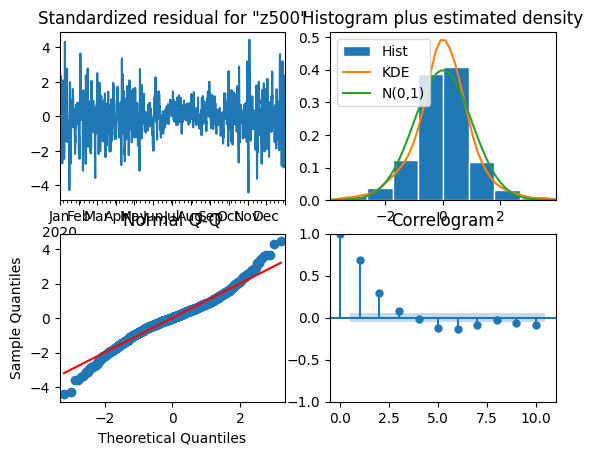

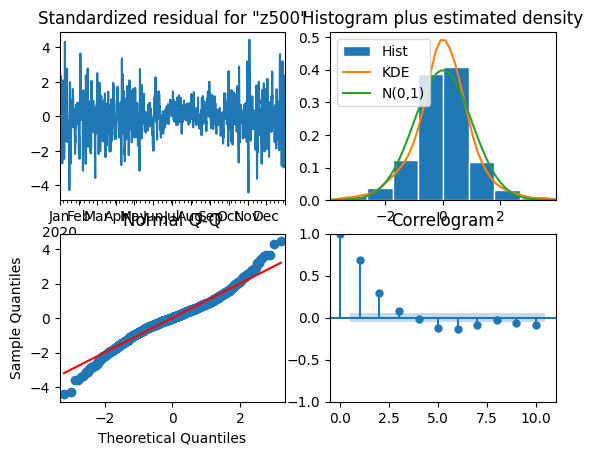

In [ ]:
from statsmodels.tsa.statespace.varmax import VARMAX

model = VARMAX(df_train, order=(1, 0))
results = model.fit(disp=False)
print(results.summary())
results.plot_diagnostics()